# Unsupervised Learning: Clustering with K-means Random

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 1. Data acquisition

In [2]:
dataset = pd.read_csv('iris_flower.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##### selecting columns 'petal_length' and 'petal_width' for the elbow method

In [3]:
X = dataset.iloc[:, [2, 3]].values
X = X[:,::-1]

## 2. Setting the number of clusters (Elbow Method)

#### We considered the columns 'petal_length' and 'petal_width' to generate the Elbow method and thus define the ideal number of clusters, according to the curve that was made.

550.6434666666671
86.40394533570999
31.38775897435898
19.499400899685114
14.084349656750577
11.079414800946152
9.514800341130607
8.278238236896588
6.832730668024787


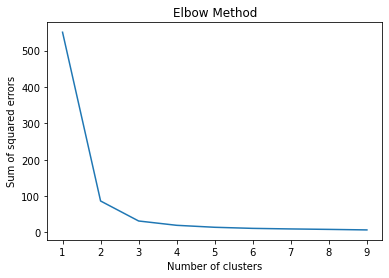

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

## 3. Training the model

##### The number of clusters is 3 because the curve shown in the Elbow method graph starts to stabilize from this number.

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'random', n_init=100)
y_kmeans = kmeans.fit_predict(X)

### showing the centroids

In [6]:
kmeans.cluster_centers_

array([[2.0375    , 5.59583333],
       [0.244     , 1.464     ],
       [1.34230769, 4.26923077]])

## 4. Visualization of clusters

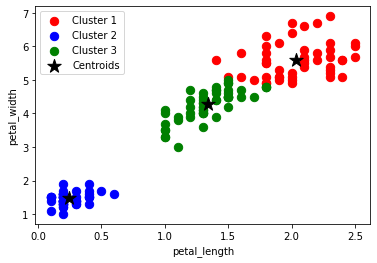

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 200, c = 'black', label = 'Centroids')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

### After we saw the visualization of clusters with value 3, we decided to divide into 5 clusters for visualization only.

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'random', n_init=100)
y_kmeans = kmeans.fit_predict(X)

In [9]:
kmeans.cluster_centers_

array([[2.05333333, 5.39666667],
       [0.244     , 1.464     ],
       [1.5       , 4.64857143],
       [1.16818182, 3.83181818],
       [2.13846154, 6.28461538]])

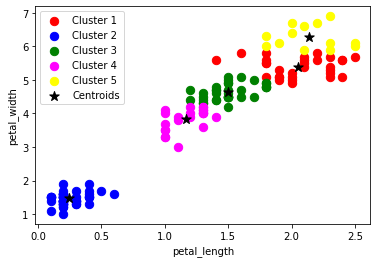

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 70, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 70, c = 'yellow', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = 'black', label = 'Centroids')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()